# Modelo usando validación cruzada

Resultados de la Validación Cruzada:
Puntuaciones RMSE: [39763.29526578 35507.17014397 53967.55015441 35373.20306474
 31256.42168082]
RMSE promedio: 39173.53
Desviación estándar: 7871.16

Coeficientes del Modelo:
OverallQual: 20391.14
GrLivArea: 50.83
YearBuilt: 301.43
TotalBsmtSF: 29.98
GarageCars: 14510.00
Intercepto: -672030.53

Puntuación R²: 0.7680


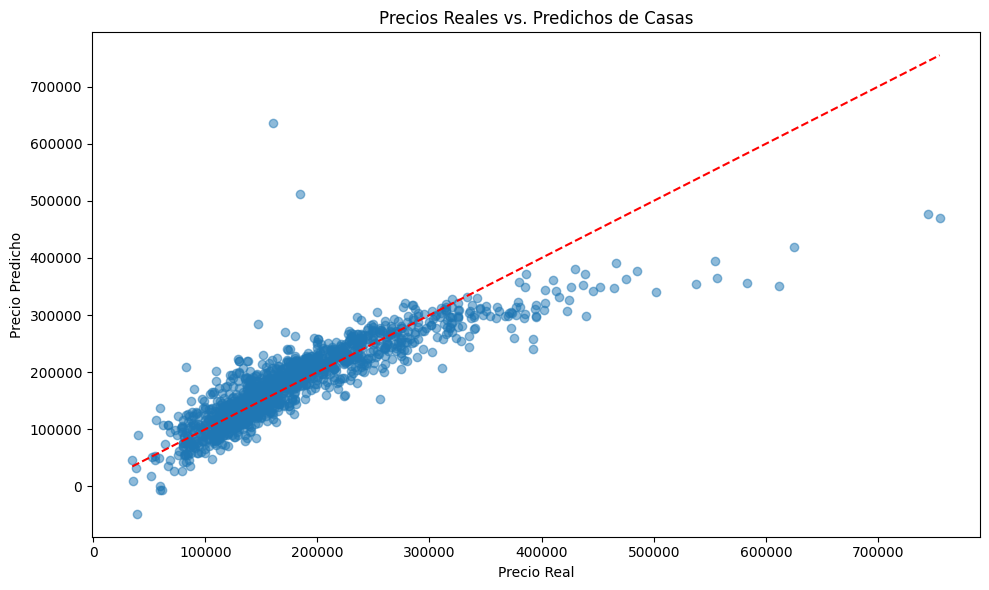

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos de entrenamiento
train_data = pd.read_csv('../../train.csv')

# Seleccionar las características más importantes según el análisis previo
features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars']

# Preparar características y variable objetivo
X = train_data[features]
y = train_data['SalePrice']

# Crear un imputador para manejar valores faltantes
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Crear el modelo
model = LinearRegression()

# Configurar validación cruzada con 5 particiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(model, X_imputed, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

# Imprimir resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
print(f"Puntuaciones RMSE: {rmse_scores}")
print(f"RMSE promedio: {np.mean(rmse_scores):.2f}")
print(f"Desviación estándar: {np.std(rmse_scores):.2f}")

# Ajustar el modelo en todos los datos de entrenamiento
model.fit(X_imputed, y)

# Imprimir coeficientes del modelo
print("\nCoeficientes del Modelo:")
for i, feature in enumerate(features):
    print(f"{feature}: {model.coef_[i]:.2f}")
print(f"Intercepto: {model.intercept_:.2f}")

# Calcular puntuación R²
y_pred = model.predict(X_imputed)
r2 = r2_score(y, y_pred)
print(f"\nPuntuación R²: {r2:.4f}")

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precios Reales vs. Predichos de Casas')
plt.tight_layout()
plt.show()